In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *
import math
%matplotlib inline

data = np.loadtxt("./data/2_source.csv",delimiter=",")   
data = np.array(data)

%matplotlib inline

# Two source PET reconstruction

In [2]:
angle_step = 15
angles=np.arange(0,len(data)*angle_step,angle_step)
print('Angles:',angles)

Angles: [ 0 15 30 45 60 75 90]


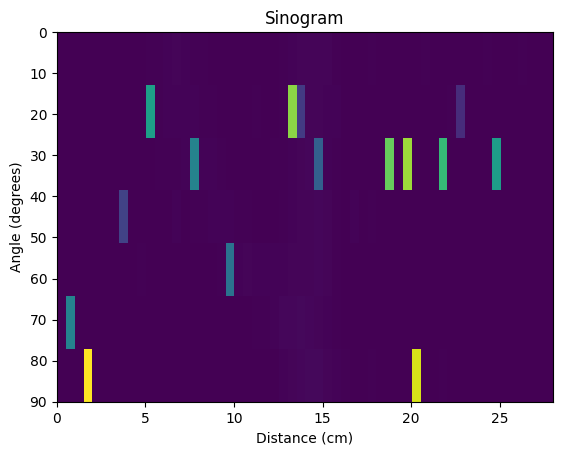

In [3]:
fig,ax = plt.subplots()
start_dist = 0
end_dist = 28
start_angle = 0
end_angle = angles[-1]  # This is the last angle in the array, no matter how many angles are in it.
ax.imshow(data,extent=[start_dist,end_dist,end_angle,start_angle],aspect="auto")
ax.set_xlabel("Distance (cm)")
ax.set_ylabel("Angle (degrees)")
ax.set_title("Sinogram");

In [8]:
from scipy import ndimage
expand_vec = np.ones(data[0].size)  # this is used to get us a square matrix
expanded_data = []
for item in data:
    expanded_data.append(np.outer(expand_vec,item))

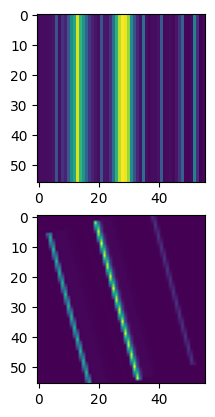

In [9]:
rotated_data = []
for index, item in enumerate(expanded_data):
    rotated_data.append(ndimage.rotate(item,angles[index],reshape=False,order=1)) # we want Numpy to keep our square, 2d matricies.
    
fig, (ax,ay) = plt.subplots(2)
ax.imshow(rotated_data[0])
ay.imshow(rotated_data[1])


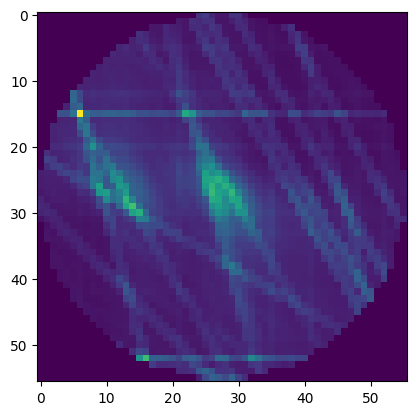

In [10]:
composite = np.ones_like(rotated_data[0])
for item in rotated_data:
    composite *= item
normalized = np.power(composite,(1/len(rotated_data))) #

fig, ax = plt.subplots()
ax.imshow(normalized)

Clearly, the composite images will hardly give us any good idea of what is going on in the blackbox. 

# Filtering Rotate Data

In [12]:
smoothingFunction(rotated_data,100)

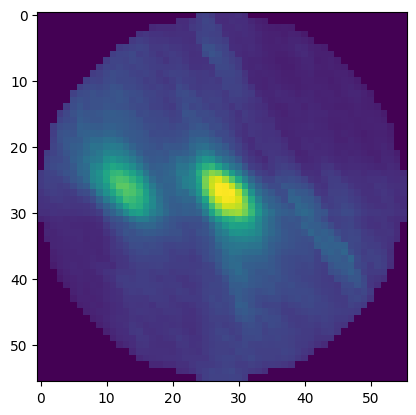

In [13]:
composite = np.ones_like(rotated_data[0])
for item in rotated_data:
    composite *= item
normalized = np.power(composite,(1/len(rotated_data))) #

fig, ax = plt.subplots()
ax.imshow(normalized)

In [14]:
from findpeaks import findpeaks

[findpeaks] >Finding peaks in 2d-array using topology method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using topology method with limit at None.
[findpeaks] >Detect peaks using topology method with limit at None.
[findpeaks] >Fin.


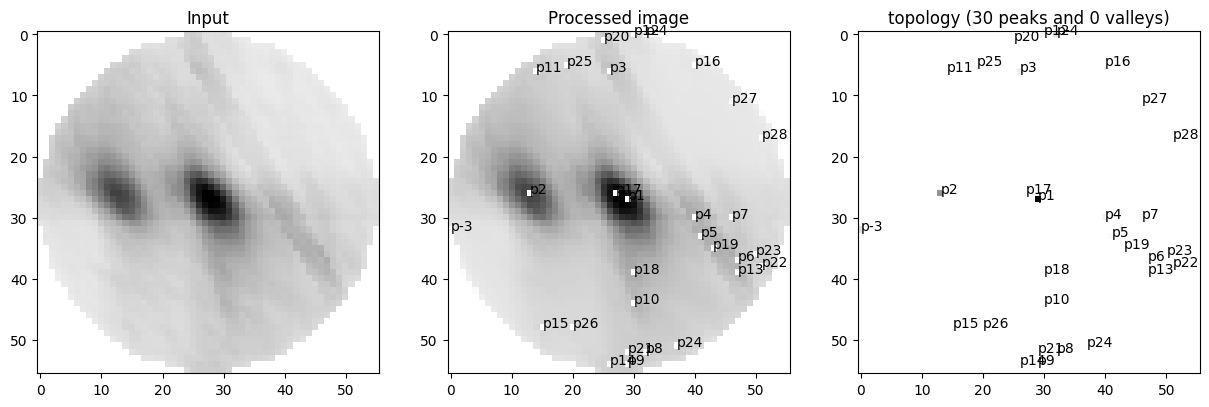

(<AxesSubplot:title={'center':'Input'}>,
 <AxesSubplot:title={'center':'Processed image'}>,
 <AxesSubplot:title={'center':'topology (30 peaks and 0 valleys)'}>)

In [15]:
fp = findpeaks(method='topology')
results = fp.fit(normalized)
fp.plot()

In [16]:
results['persistence'].head()

,x,y,birth_level,death_level,score,peak,valley
0,29,27,255.0,0.0,255.0,True,False
1,13,26,190.0,82.0,108.0,True,False
2,26,6,63.0,46.0,17.0,True,False
3,40,30,86.0,73.0,13.0,True,False
4,41,33,83.0,78.0,5.0,True,False


Using the findpeaks package, we can create a function that automatically identify feature location and with resolution uncertainty according to Poisson counting statistics.

In [17]:
x = []
step = 0.5
while step <= 28:
    x.append(step)
    step += 0.5

x = np.array(x)
x

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. ])

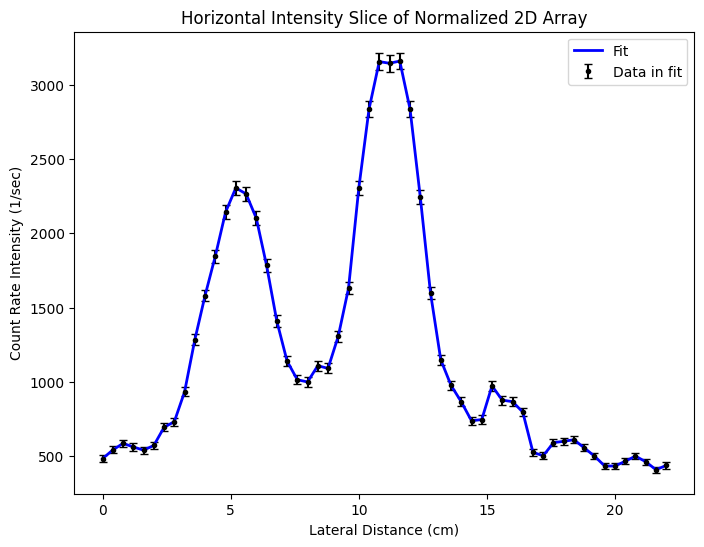

In [22]:
y = normalized[27]
dy = np.sqrt(y)

fig,ax = plt.subplots(figsize = (8,6))


ax.errorbar(x, y, yerr = dy,fmt= 'k.', capsize = 3, label='Data in fit')
ax.plot(x, y, color = 'blue', linewidth = 2, label='Fit')



ax.set_title('Horizontal Intensity Slice of Normalized 2D Array')
ax.set_xlabel('Lateral Distance (cm)')
ax.set_ylabel('Count Rate Intensity (1/sec)')
ax.legend()

In [19]:
xcoord = results['persistence'].iloc[0]['x']
ycoord = results['persistence'].iloc[0]['y']

featureIdentification(normalized,x,xcoord,ycoord,(6,6),(6,6))


Converged with chi-squared 31.38
Number of degrees of freedom, dof = 8.00
Reduced chi-squared 3.92

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.263e+04                | 9.885e+03                | 5.249e+02               
1           | 1.450e+01                | 1.447e+01                | 1.567e-02               
2           | 2.000e+00                | 1.467e+00                | 4.695e-02               
3           | 3.158e+02                | 6.165e+02                | 7.303e+01               

Converged with chi-squared 46.48
Number of degrees of freedom, dof = 8.00
Reduced chi-squared 5.81

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.263e+04                | 9.793e+03                | 3.927e+02               
1           | 1.350e+01                | 1.444e+01                | 1.828e-02               
2           | 2.000e+00     

In [20]:
xcoord = results['persistence'].iloc[1]['x']
ycoord = results['persistence'].iloc[1]['y']

featureIdentification(normalized,x,xcoord,ycoord,(6,6),(6,6))


Converged with chi-squared 16.12
Number of degrees of freedom, dof = 8.00
Reduced chi-squared 2.02

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 9.428e+03                | 6.691e+03                | 6.966e+02               
1           | 6.500e+00                | 6.881e+00                | 2.223e-02               
2           | 2.000e+00                | 1.557e+00                | 9.021e-02               
3           | 2.357e+02                | 6.425e+02                | 9.466e+01               

Converged with chi-squared 78.65
Number of degrees of freedom, dof = 8.00
Reduced chi-squared 9.83

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 9.428e+03                | 5.111e+03                | 4.326e+02               
1           | 1.300e+01                | 1.350e+01                | 2.526e-02               
2           | 2.000e+00     

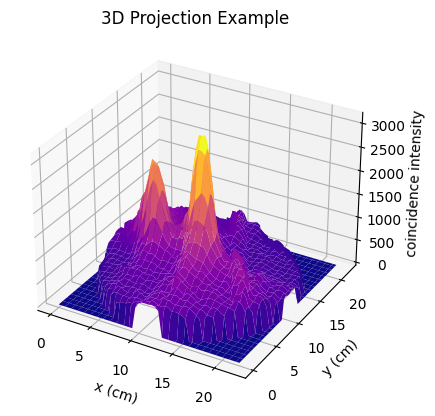

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,22,len(normalized)) 
y = np.linspace(0,22,len(normalized))
X, Y = np.meshgrid(x, y)

flipped = normalized[::-1] 
ax.plot_surface(X, Y, flipped,cmap='plasma')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('coincidence intensity')
ax.set_title('3D Projection Example');